In [11]:
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from keras import layers
mnist = keras.datasets.mnist.load_data()

In [2]:
def process_image(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale
    img = img.convert('L')

    # Resize to 28x28 (same as MNIST images)
    img = img.resize((28, 28))

    # Convert to numpy array
    img_array = np.array(img)

    # Invert the pixel values for MNIST-like representation
    img_array = 255 - img_array

    # Normalize the pixel values to [0, 1]
    img_array = img_array / 255.0

    # Reshape for the model (1, 28, 28)
    img_array = img_array.reshape(1, 28, 28)

    return img_array


def show_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()


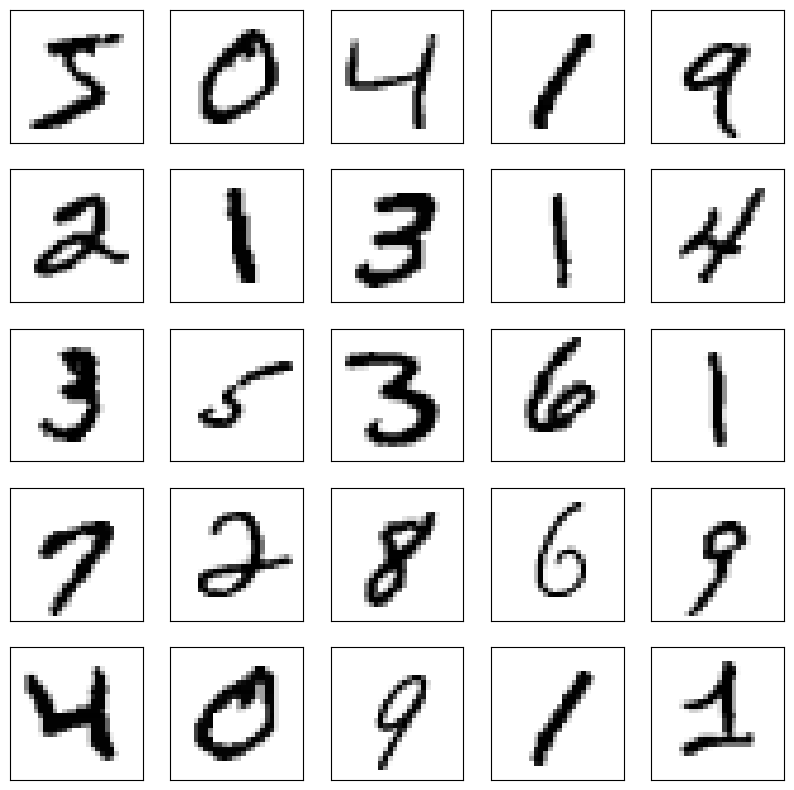

In [3]:
(x_train, y_train), (x_test, y_test) = mnist
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [12]:

model = keras.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.2960 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 1s 783us/step - loss: 0.1400 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.1061 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.0873 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.0745 - accuracy: 0.9766


In [13]:
result = model.evaluate(x_test,  y_test, verbose=2)
print(f'{result[1]*100}% Accuracy')

import pickle
import os

model_path = os.path.join(f'mnsit.pkl')

with open(model_path, 'wb') as f:
   pickle.dump(model, f)

313/313 - 0s - loss: 0.0778 - accuracy: 0.9765 - 201ms/epoch - 643us/step
97.64999747276306% Accuracy


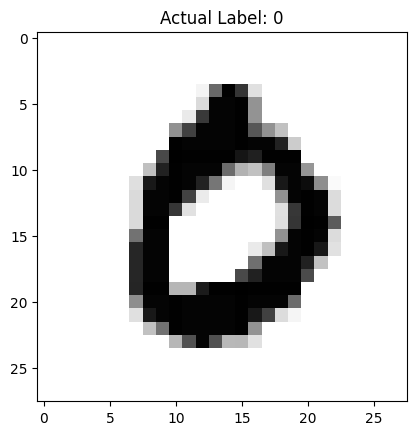

In [14]:
image_index = 3
selected_image = x_test[image_index]

# Display the selected image
plt.imshow(selected_image, cmap=plt.cm.binary)
plt.title(f"Actual Label: {y_test[image_index]}")
plt.show()

In [15]:

# Prepare the image for prediction (reshape to match model's input)
image_for_prediction = selected_image.reshape(1, 28, 28)

# Predict the image
predictions = model.predict(image_for_prediction)

# Display the prediction
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 29ms/step
Predicted Label: 0


In [16]:
img_path = r'seven.jpg'

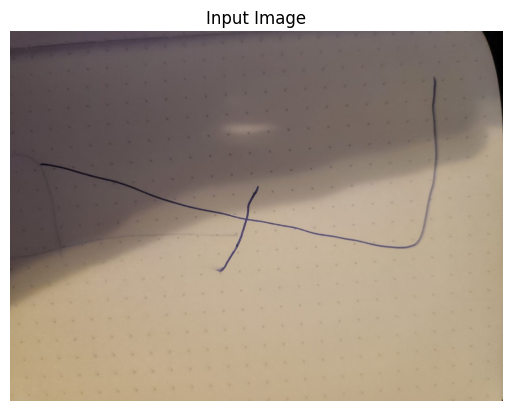

In [17]:
show_image(img_path)
img = process_image(img_path)

In [18]:
predictions = model.predict(img)
# Display the prediction
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 12ms/step
Predicted Label: 7
